# COGS 108 - Data Checkpoint

## Authors


- **Ava Kam**- Background research, Visualization, Conceptualization, Project administration, Writing - original draft, Writing – review & editing<br>
- **Amelia Lin**- Background research ,Visualization, Conceptualization, Project administration, Writing - original draft, Writing – review & editing<br>
- **Neha Khalkho**- Background research, Experimental investigation, Writing – original draft, Writing – review & editing<br>
- **Charlie Ngo**- Analysis, Background research, Data curation, Experimental investigation, Software, Writing – Review & editing<br>
- **Ben Chen**- Analysis, Background research, Data curation, Experimental investigation, Software, Writing – Review & editing<br>

## Research Question

To what extent can county-level unemployment rates, per-capita personal income, and regional economic activity be used to predict drug overdose mortality rates in California counties from 2010–2019, and how far in advance do changes in these economic indicators signal future increases in overdose deaths?

## Background and Prior Work

Drug abuse has been a prevalent societal issue plaguing the US society for the past decades, yet interestingly, different counties and regions seem to have significantly different drug abuse levels. There could be a plethora of reasons why a particular county or region experiences a drastic increase or decrease in drug abuse, among which include local economic landscape, healthcare service availability, education level,l and so on<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1).<br>

Given that there is a high comorbidity between drug abuse and psychiatric disorder/mental health crisis<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), and the fact that financial stressors and local economic landscape significantly impact the psychological distress<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3), we believe the economic landscape(unemployment rate and economic decline) could potentially predict drug abuse rate. These predictions could potentially help us better prepare regions from drug abuse and public health crises, during certain economic landscapes.<br>

Like how we hypothesized, there do seem to be studies showing the potential relationship between economic recession/unemployment rate and drug usage<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4). For instance 17 out of 28 studies in this literature review found this "counter-cyclical mechanism" where unempolyment increase and recession lead to increased drug use<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4).


***Reference***

1. <a name="cite_note-1"></a> [^](#cite_ref-1) National Institute on Drug Abuse. (2020, July 10). Understanding drug use and addiction drugfacts. https://nida.nih.gov/publications/drugfacts/understanding-drug-use-addiction
   
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Substance Abuse and Mental Health Services Administration. (2021). Key substance use and mental health indicators in the United States: Results from the 2020 National Survey on Drug Use and Health. Center for Behavioral Health Statistics and Quality, Substance Abuse and Mental Health Services Administration. https://www.ncbi.nlm.nih.gov/books/NBK571451/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Ryu, S., & Fan, L. (2022). The relationship between financial worries and psychological distress among U.S. adults. Journal of Family and Economic Issues, 44(1), 16–33. https://doi.org/10.1007/s10834-022-09820-9
   
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Nagelhout, G. E., Hummel, K., de Goeij, M. C., de Vries, H., Kaner, E., & Lemmens, P. (2017). How economic recessions and unemployment affect illegal drug use: A systematic realist literature review. International Journal of Drug Policy, 44, 69–83. https://doi.org/10.1016/j.drugpo.2017.03.013

## Hypothesis


**Hypothesis**: Higher county-level unemployment rates and lower per-capita personal income will be able to accurately predict increases in drug overdose mortality rates per 100,000 residents in California counties from 2010–2019. Furthermore, increases in unemployment will predict increases in overdose mortality rates with a lag of one to two years across California counties.
<br>

**Null Hypothesis**: County-level unemployment rates, per-capita personal income, and their lagged values are not significantly associated with drug overdose mortality rates in California counties from 2010–2019.
<br>

**Rationale**: Economic distress has been linked with increased substance use and overdose mortality due to reduced social security, financial strain, and decreased access to healthcare. The proxies we decided to look at include: Unemployment rate, which represents short-term economic shock, per-capita income, and regional economic activity, which both capture more long-term financial stress. Consequently, counties experiencing higher unemployment and lower income levels are more likely to exhibit higher rates of overdose mortality. Furthermore, economic shocks may not immediately translate into mortality, suggesting that there is a significant lag from when unemployment increases to a spike in drug overdose mortalities by one or more years. 


## Data

In [10]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Overview


- **Dataset #1**
  - Dataset Name: ***California Drug Overdose by County***
  - Link to the dataset: https://github.com/COGS108/Group078_WI26/blob/master/County%20Drug%20Deaths.csv 
  - Number of observations: There are about 58 counties in California and multiple years of data, so roughly a few hundred observations in total. Each row represents a county in a particular year.
  - Number of variables: There are around 5–6 key variables, including the county name, year, total drug overdose deaths, population, and possibly rates per 100,000 people.
  - Variables most relevant to this project: 
    - County: tells us which county the data is for
    - Year: the time period of the observation
    - Drug Overdose Deaths / Rate: the actual number or rate of deaths in that county, which is the main variable we’re analyzing
    - Population: can be used to calculate per-capita rates or standardize data
  - Dataset shortcomings:
    - Some counties may have very few deaths in certain years, which can make the data noisy or misleading
    - Smaller counties with low counts may have suppressed or missing values to protect privacy
    - The dataset only tracks drug overdose deaths, so it doesn’t include other health or demographic factors that could help explain trends
    - Yearly data may not capture short-term spikes or local outbreaks
- **Dataset #2** 
  - Dataset Name: ***U.S. Bureau of Economic Analysis Regional GDP and Personal Income Dataset***
  - Link to the dataset: https://apps.bea.gov/itable/?ReqID=70&step=1&_gl=1*1nng24c*_ga*MjEzMjM4MzUxOS4xNzI1OTg2NTUz*_ga_J4698JNNFT*MTc0MTM4ODkxMy40My4xLjE3NDEzOTEwMjQuNDYuMC4w#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCIyMCJdLFsiTWFqb3JfQXJlYSIsIjQiXSxbIlN0YXRlIixbIjA2MDAwIl1dLFsiQXJlYSIsWyIwNjAwMCJdXSxbIlN0YXRpc3RpYyIsWyIzIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWxzIl0sWyJZZWFyIixbIi0xIl1dLFsiWWVhckJlZ2luIiwiLTEiXSxbIlllYXJfRW5kIiwiLTEiXV19 
  - Number of observations: There are roughly 1,000–2,000 observations depending on which states and years are included. Each row represents a state or region for a specific year and economic measure.
  - Number of variables: There are about 6-7 variables, including the county, the year, the type of statistic (GDP, personal income), the population size, and the economic value itself.
  - Variables most relevant to this project
    - State / Major Area: tells you which state or region the data is for
    - Year: shows the time period for each observation
    - Statistic: indicates whether the number is GDP, personal income, or another measure
    - Value: the actual economic number in dollars, which is what we would use to analyze trends or make predictions
  - Dataset shortcomings:
    - Some years or regions might be missing data, especially older years or smaller areas
    - The data is mostly aggregated, so it doesn’t show finer details within each state
    - It only includes economic measures, so other factors like population or policy aren’t included
    - The dataset is updated yearly, so it’s not great for predicting real-time changes
- **Dataset #3** 
  - Dataset Name: ***Local Area Unemployment Statistics (LAUS), Seasonally Adjusted – California***
  - Link to the dataset:  https://data.bls.gov/multi-screen?survey=la
  - Number of observations: There are thousands of observations since the dataset tracks monthly unemployment for all counties in California over many years. Each row represents a county in a specific month and year.
  - Number of variables: There are around 5–7 key variables, including the county, month, year, labor force size, number of unemployed people, and the unemployment rate.
  - Variables most relevant to this project: 
    - County / Area: tells us which part of California the data refers to
    - Year / Month: indicates the time period of the observation
    - Labor Force / Unemployed: the actual numbers of people employed or unemployed
    - Unemployment Rate: percentage of the labor force that is unemployed, which is often the main variable of interest for analysis
  - Dataset shortcomings: 
    - Some smaller counties may have noisy data or missing values for certain months
    - The dataset only tracks unemployment and labor force info, so it doesn’t include other economic factors like income or GDP
    - Since the data is seasonally adjusted, it might hide short-term fluctuations
    - Monthly data can be harder to merge with datasets that are only available annually
- **Dataset Combination Plan**:
  <br>To combine the three datasets, we will first standardize county names and years so they align across all sources. We will then merge the data by county and year, resulting in a dataset where each row represents one county in a specific year and includes the unemployment rate (LAUS), per-capita personal income and GDP (BEA), and drug overdose deaths (County Overdose dataset). Additionally, we will create derived variables, such as overdose rates per 100,000 residents, and lagged economic indicators to explore how changes in unemployment or income may predict future overdose mortality. This merged dataset will be used as the input for building a predictive model.
  <br>

In [12]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [14]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/COGS108/Group078_WI26/refs/heads/master/data/00-raw/BEA_econ_dataset.csv', 'filename':'BEA_econ_dataset.csv'},
    { 'url': 'https://raw.githubusercontent.com/COGS108/Group078_WI26/refs/heads/master/data/00-raw/labour_stats_season_adjusted_dataset.csv', 'filename': 'labour_stats_season_adjusted_dataset.csv'},
    { 'url': 'https://raw.githubusercontent.com/COGS108/Group078_WI26/refs/heads/master/data/00-raw/BLS_county_level_CA.csv', 'filename': 'BLS_county_level_CA.csv'},
    { 'url': 'https://raw.githubusercontent.com/COGS108/Group078_WI26/master/data/00-raw/county_drug_deaths.csv', 'filename':'county_drug_deaths.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  25%|████▌             | 1/4 [00:00<00:00,  4.57it/s]

Successfully downloaded: BEA_econ_dataset.csv



Overall Download Progress:  75%|█████████████▌    | 3/4 [00:00<00:00,  3.41it/s]

Successfully downloaded: labour_stats_season_adjusted_dataset.csv
Error downloading BLS_county_level_CA.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/COGS108/Group078_WI26/refs/heads/master/data/00-raw/BLS_county_level_CA.csv



Overall Download Progress: 100%|██████████████████| 4/4 [00:01<00:00,  3.88it/s]

Successfully downloaded: county_drug_deaths.csv


### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


In [16]:
data_drugs = pd.read_csv("data/00-raw/county_drug_deaths.csv")
data_drugs.head()

,Notes,County,County Code,Year,Year Code,Underlying Cause of death,Underlying Cause of death Code,Multiple Cause of death,Multiple Cause of death Code,Deaths,Population,Crude Rate
0,NaN,"Alameda County, CA",6001.0,2018.0,2018.0,Accidental poisoning by and exposure to antiep...,X41,Psychostimulants with abuse potential,T43.6,38.0,1666753.0,2.3
1,NaN,"Alameda County, CA",6001.0,2018.0,2018.0,Accidental poisoning by and exposure to antiep...,X41,Accidental poisoning by and exposure to antiep...,X41,39.0,1666753.0,2.3
2,NaN,"Alameda County, CA",6001.0,2018.0,2018.0,Accidental poisoning by and exposure to narcot...,X42,Other opioids,T40.2,14.0,1666753.0,Unreliable
3,NaN,"Alameda County, CA",6001.0,2018.0,2018.0,Accidental poisoning by and exposure to narcot...,X42,Other synthetic narcotics,T40.4,10.0,1666753.0,Unreliable
4,NaN,"Alameda County, CA",6001.0,2018.0,2018.0,Accidental poisoning by and exposure to narcot...,X42,Cocaine,T40.5,31.0,1666753.0,1.9


As we can see, the dataset is neatly formatted in a csv file type. 

In [18]:
data_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Notes                           98 non-null     object 
 1   County                          1879 non-null   object 
 2   County Code                     1879 non-null   float64
 3   Year                            1879 non-null   float64
 4   Year Code                       1879 non-null   float64
 5   Underlying Cause of death       1879 non-null   object 
 6   Underlying Cause of death Code  1879 non-null   object 
 7   Multiple Cause of death         1879 non-null   object 
 8   Multiple Cause of death Code    1879 non-null   object 
 9   Deaths                          1879 non-null   float64
 10  Population                      1879 non-null   float64
 11  Crude Rate                      1879 non-null   object 
dtypes: float64(5), object(7)
memory us

The size of the dataset contains 1977 rows and 12 columns. There are 7 object datatypes and 5 integer datatypes.

In [20]:
data_drugs.isna().sum()

Notes                             1879
County                              98
County Code                         98
Year                                98
Year Code                           98
Underlying Cause of death           98
Underlying Cause of death Code      98
Multiple Cause of death             98
Multiple Cause of death Code        98
Deaths                              98
Population                          98
Crude Rate                          98
dtype: int64

There appears to be null 98 entries. There are 1879 null entries in the notes section because the Notes columns contains additional information such as footnotes and caveats at the bottom of the dataset. 

In [22]:
data_drugs['Crude Rate'].describe()

count           1879
unique           239
top       Unreliable
freq             727
Name: Crude Rate, dtype: object

In [23]:
(data_drugs['Crude Rate'] == 'Unreliable').sum()

np.int64(727)

Most of the crude rates are labeled as unreliable. This will result in a skewed distribution.

To clean this dataset, we will first drop the **Notes** column because it contains many null values. We will also drop **Year Code**, as it is redundant with the **Year** column. Next, we will remove any rows that contain only null values. We will convert numeric columns currently stored as floats to integer datatypes where appropriate, such as **Deaths** and **Population**. We will also generalize the **Underlying Cause of Death (UCD)** and **Multiple Cause of Death (MCD)** labels into broader categories to reduce sparsity and simplify analysis. 

To address the “Unreliable” entries in the **Crude Rate** column, we will recompute the crude rate manually using `Deaths / Population * 100,000` and convert the column to a float datatype. Finally, we will create two additional columns **Total Deaths by County and Year** and **Crude Rate by County and Year** to provide stable county-level aggregate metrics that give context for individual drug-specific deaths and allow for comparison across counties of different population sizes.

In [26]:
# Copy for Clean Data 
data_drugs_clean = data_drugs.copy()
data_drugs_clean = data_drugs_clean.drop(columns=['Notes', 'Year Code', 'Underlying Cause of death', 'Multiple Cause of death'])
data_drugs_clean = data_drugs_clean.dropna()

data_drugs_clean[['Year','Population','Deaths', 'County Code']] = data_drugs_clean[['Year','Population','Deaths', 'County Code']].astype('int64')

In [27]:
data_drugs_clean.isna().sum()

County                            0
County Code                       0
Year                              0
Underlying Cause of death Code    0
Multiple Cause of death Code      0
Deaths                            0
Population                        0
Crude Rate                        0
dtype: int64

In [28]:
data_drugs_clean.dtypes

County                            object
County Code                        int64
Year                               int64
Underlying Cause of death Code    object
Multiple Cause of death Code      object
Deaths                             int64
Population                         int64
Crude Rate                        object
dtype: object

In [29]:
data_drugs_clean['Underlying Cause of death Code'].unique()

array(['X41', 'X42', 'X44', 'X64', 'X61', 'X62', 'X40', 'Y14'],
      dtype=object)

In [30]:
data_drugs_clean['Multiple Cause of death Code'].unique()

array(['T43.6', 'X41', 'T40.2', 'T40.4', 'T40.5', 'X42', 'X44', 'X64',
       'T40.1', 'T42.4', 'T40.3', 'X61', 'X62', 'X40', 'Y14'],
      dtype=object)

In [31]:
# Replace ICD-10 codes with general labels 

mappings_UCD = {'X41': 'accidental', 'X42': 'accidental', 'X44': 'accidental', 'X64': 'intentional',
                'X61': 'intentional', 'X62': 'intentional', 'X40': 'accidental', 'Y14': 'undetermined'}

mappings_MCD = {'T40.1': 'Heroin', 'T40.2': 'Other opiods', 'T40.3': 'Methadone', 'T40.4': 'Synthetic opioids',
                'T40.5': 'Cocaine', 'T42.4': 'Sedatives', 'T43.6': 'Psychostimulants', 'X40': 'Unspecified',
                'X41': 'Unspecified', 'X42': 'Unspecified', 'X44': 'Unspecified', 'X61': 'Unspecified', 
                'X62': 'Unspecified', 'X64': 'Unspecified', 'Y14': 'Unspecified'}

data_drugs_clean['Underlying Cause of death Code'] = data_drugs_clean['Underlying Cause of death Code'].map(mappings_UCD)
data_drugs_clean['Multiple Cause of death Code'] = data_drugs_clean['Multiple Cause of death Code'].map(mappings_MCD)

In [32]:
# Recompute crude weight to get rid of Unreliable 
data_drugs_clean['Crude Rate'] = data_drugs_clean['Deaths'] / data_drugs_clean['Population'] * 100000
data_drugs_clean['Crude Rate'] = data_drugs_clean['Crude Rate'].round(2)

In [33]:
# Compute total deaths per county-year
data_drugs_clean['Total Deaths by County and Year'] = data_drugs_clean.groupby(['County','Year'])['Deaths'].transform('sum')

# Compute crude rate for total by 100000
data_drugs_clean['Crude Rate by County and Year'] = (data_drugs_clean['Total Deaths by County and Year'] / data_drugs_clean['Population'] * 100000).round(2)

In [34]:
data_drugs_clean.to_csv("data/02-processed/county_drug_deaths_clean.csv", index=False)

This is the final clean version of the drug dataset.

In [36]:
data_drugs_clean

,County,County Code,Year,Underlying Cause of death Code,Multiple Cause of death Code,Deaths,Population,Crude Rate,Total Deaths by County and Year,Crude Rate by County and Year
0,"Alameda County, CA",6001,2018,accidental,Psychostimulants,38,1666753,2.28,276,16.56
1,"Alameda County, CA",6001,2018,accidental,Unspecified,39,1666753,2.34,276,16.56
2,"Alameda County, CA",6001,2018,accidental,Other opiods,14,1666753,0.84,276,16.56
3,"Alameda County, CA",6001,2018,accidental,Synthetic opioids,10,1666753,0.60,276,16.56
4,"Alameda County, CA",6001,2018,accidental,Cocaine,31,1666753,1.86,276,16.56
...,...,...,...,...,...,...,...,...,...,...
1874,"Yuba County, CA",6115,2022,accidental,Psychostimulants,11,84310,13.05,61,72.35
1875,"Yuba County, CA",6115,2022,accidental,Unspecified,15,84310,17.79,61,72.35
1876,"Yuba County, CA",6115,2023,accidental,Synthetic opioids,15,85722,17.50,46,53.66
1877,"Yuba County, CA",6115,2023,accidental,Psychostimulants,15,85722,17.50,46,53.66


### Dataset #2 U.S. Bureau of Economic Analysis Regional GDP and Personal Income Dataset

#### Dataset Description:
This dataset is obtained directly through The U.S. Bureau of Economic Analysis. The Gross personal income by county, county population size, and the per capita personal income values are obtained for all 58 counties in the state of California, across 15 years from 2010 to 2014.<br>
The Dataset on it own is a good baseline for many of the downstream analysis we will run.
#### Dataset Limitations:
1. This dataset only includes county level income data, and have relatively low temporal resolution. i.e. only one mesurement per county is taken per year, instead of tracking the change in the income per captia over each month.

2. In some area, particularly rural parts of California, the size of informal economy(where people trade without documenting or paying any tax) may be large. Thus, we have to take into consideration of the fact that this dataset may not 100% reflect the per capita income landscape across different counties in CA.


In [38]:
# Importing Dataset 2
# Skip the first 3 rows which are metadata/legends
df_CA_personal_income = pd.read_csv("data/00-raw/BEA_econ_dataset.csv", on_bad_lines='skip', skiprows=3)

# Quick Look at the Dataset
print("Quick Look at the U.S. Bureau of Economic Analysis Regional GDP and Personal Income Dataset")
print(df_CA_personal_income.head())
print(type(df_CA_personal_income))
print("\nDataFrame shape:", df_CA_personal_income.shape)
print("\nColumn names:")
print(df_CA_personal_income.columns.tolist())

Quick Look at the U.S. Bureau of Economic Analysis Regional GDP and Personal Income Dataset
  GeoFIPS      GeoName  LineCode                             Description  \
0   06000   California       1.0  Personal income (thousands of dollars)   
1   06000   California       2.0                  Population (persons) 1   
2   06000   California       3.0  Per capita personal income (dollars) 2   
3   06001  Alameda, CA       1.0  Personal income (thousands of dollars)   
4   06001  Alameda, CA       2.0                  Population (persons) 1   

           2010          2011          2012          2013          2014  \
0  1.609997e+09  1.713428e+09  1.814763e+09  1.840885e+09  1.955718e+09   
1  3.732252e+07  3.765121e+07  3.797141e+07  3.829256e+07  3.863742e+07   
2  4.313700e+04  4.550800e+04  4.779300e+04  4.807400e+04  5.061700e+04   
3  7.207501e+07  7.730133e+07  8.143544e+07  8.577718e+07  9.203812e+07   
4  1.513413e+06  1.532981e+06  1.557493e+06  1.584943e+06  1.614744e+06   



In [39]:
# Making sure each row uses the same unit for measurment

# Converting rows with unit (thousands of dollars) into the unit (dollars)
# Filter rows where LineCode == 1.0 (Personal income rows)
personal_income_rows = df_CA_personal_income['LineCode'] == 1.0

# Multiply all year columns by 1000 for personal income rows
year_columns = [col for col in df_CA_personal_income.columns if col.isdigit()]
df_CA_personal_income.loc[personal_income_rows, year_columns] = df_CA_personal_income.loc[personal_income_rows, year_columns] * 1000

# Update the description column for personal income rows
df_CA_personal_income.loc[personal_income_rows, 'Description'] = 'Personal income (dollars)'

# Verify the changes
print("Updated DataFrame (showing personal income rows):")
print(df_CA_personal_income[df_CA_personal_income['LineCode'] == 1.0].head())


Updated DataFrame (showing personal income rows):
   GeoFIPS      GeoName  LineCode                Description          2010  \
0    06000   California       1.0  Personal income (dollars)  1.609997e+12   
3    06001  Alameda, CA       1.0  Personal income (dollars)  7.207501e+10   
6    06003   Alpine, CA       1.0  Personal income (dollars)  4.869100e+07   
9    06005   Amador, CA       1.0  Personal income (dollars)  1.300768e+09   
12   06007    Butte, CA       1.0  Personal income (dollars)  7.254896e+09   

            2011          2012          2013          2014          2015  \
0   1.713428e+12  1.814763e+12  1.840885e+12  1.955718e+12  2.097050e+12   
3   7.730133e+10  8.143544e+10  8.577718e+10  9.203812e+10  1.012311e+11   
6   5.955200e+07  6.349800e+07  6.305900e+07  6.836400e+07  7.146700e+07   
9   1.309908e+09  1.325416e+09  1.336888e+09  1.399961e+09  1.481210e+09   
12  7.394936e+09  7.606689e+09  7.807319e+09  8.138129e+09  8.782120e+09   

            2016        

In [40]:
# Removing the rows with NaN from the dataset
# See where NaN values are
print(df_CA_personal_income.isnull().sum())
print("\nRows with any NaN:")
print(df_CA_personal_income.isnull().any(axis=1).sum())

# Remove rows with NaN
df_CA_personal_income = df_CA_personal_income.dropna()

GeoFIPS        0
GeoName        5
LineCode       5
Description    5
2010           5
2011           5
2012           5
2013           5
2014           5
2015           5
2016           5
2017           5
2018           5
2019           5
2020           5
2021           5
2022           5
2023           5
2024           5
dtype: int64

Rows with any NaN:
5


In [41]:
# Columns and Rows in the dataset
print("====Properties of the dataset====")

print("====Years====")
print(*year_columns)
print(f"Number of years included in the Dataset: {len(year_columns)}")

print("====County in California====")
county_list_raw = df_CA_personal_income["GeoName"].unique()
county_list = []
for i in range(len(county_list_raw)):
    if "CA" in str(county_list_raw[i]):
        county_list.append(county_list_raw[i])
    else:
        continue
# print(df_CA_personal_income["GeoName"].unique())
print(county_list)
print(f"Number of counties included in the Dataset: {len(county_list)}")

print("====Economic Metrics Included====")
for metric in df_CA_personal_income["Description"].unique():
    print(metric)

====Properties of the dataset====
====Years====
2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
Number of years included in the Dataset: 15
====County in California====
['Alameda, CA', 'Alpine, CA', 'Amador, CA', 'Butte, CA', 'Calaveras, CA', 'Colusa, CA', 'Contra Costa, CA', 'Del Norte, CA', 'El Dorado, CA', 'Fresno, CA', 'Glenn, CA', 'Humboldt, CA', 'Imperial, CA', 'Inyo, CA', 'Kern, CA', 'Kings, CA', 'Lake, CA', 'Lassen, CA', 'Los Angeles, CA', 'Madera, CA', 'Marin, CA', 'Mariposa, CA', 'Mendocino, CA', 'Merced, CA', 'Modoc, CA', 'Mono, CA', 'Monterey, CA', 'Napa, CA', 'Nevada, CA', 'Orange, CA', 'Placer, CA', 'Plumas, CA', 'Riverside, CA', 'Sacramento, CA', 'San Benito, CA', 'San Bernardino, CA', 'San Diego, CA', 'San Francisco, CA', 'San Joaquin, CA', 'San Luis Obispo, CA', 'San Mateo, CA', 'Santa Barbara, CA', 'Santa Clara, CA', 'Santa Cruz, CA', 'Shasta, CA', 'Sierra, CA', 'Siskiyou, CA', 'Solano, CA', 'Sonoma, CA', 'Stanislaus, CA', 'Sutter, CA', 'Teh

In [42]:
# Description of the basic data statistics
# Breaking each variable into its own df
df_county_personal_income = df_CA_personal_income[df_CA_personal_income["Description"] == "Personal income (dollars)"]
df_county_population = df_CA_personal_income[df_CA_personal_income["Description"] == "Population (persons) 1"]
df_county_per_cap_income = df_CA_personal_income[df_CA_personal_income["Description"] == "Per capita personal income (dollars) 2"]

print(df_county_personal_income.describe())
print(df_county_population.describe())
print(df_county_per_cap_income.describe())

       LineCode          2010          2011          2012          2013  \
count      59.0  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01   
mean        1.0  5.457619e+10  5.808231e+10  6.151739e+10  6.240289e+10   
std         0.0  2.148662e+11  2.287511e+11  2.424072e+11  2.456058e+11   
min         1.0  4.869100e+07  5.955200e+07  6.349800e+07  6.305900e+07   
25%         1.0  1.748115e+09  1.795724e+09  1.826820e+09  1.817009e+09   
50%         1.0  7.185521e+09  7.394936e+09  7.606689e+09  7.807319e+09   
75%         1.0  2.410796e+10  2.511292e+10  2.664695e+10  2.724290e+10   
max         1.0  1.609997e+12  1.713428e+12  1.814763e+12  1.840885e+12   

               2014          2015          2016          2017          2018  \
count  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01   
mean   6.629553e+10  7.108643e+10  7.427586e+10  7.779826e+10  8.173068e+10   
std    2.608683e+11  2.796542e+11  2.920794e+11  3.057815e+11  3.211169e+11   
min    6

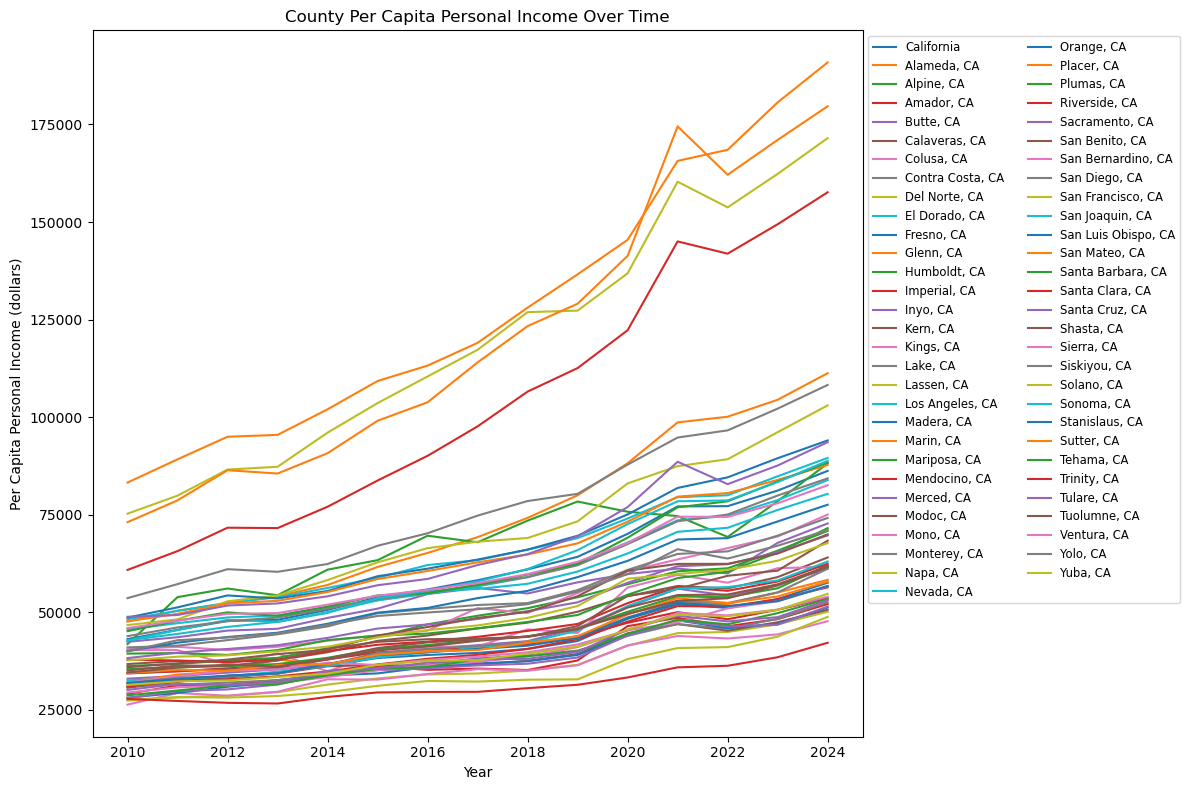

In [43]:
# Filter for per capita personal income rows
per_capita_rows = df_CA_personal_income['Description'].str.contains('Per capita personal income')
df_per_capita = df_CA_personal_income[per_capita_rows]

# Set up the years for plotting
years = [int(col) for col in year_columns]

plt.figure(figsize=(12, 8))

# Plot each county's per capita income as a line
for idx, row in df_per_capita.iterrows():
    county = row['GeoName']
    values = row[year_columns].values.astype(float)
    plt.plot(years, values, label=county)

plt.xlabel('Year')
plt.ylabel('Per Capita Personal Income (dollars)')
plt.title('County Per Capita Personal Income Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

### Dataset #3.1 Local Area Unemployment Statistics (LAUS), Seasonally Adjusted (provided by California Employment Development Department)

#### Dataset Description:
Metro Area or <br>
The Dataset on it own is a good baseline for many of the downstream analysis we will run.
#### Dataset Limitations:
1. This dataset only includes county level income data, and have relatively low temporal resolution. i.e. only one mesurement per county is taken per year, instead of tracking the change in the income per captia over each month.

2. In some area, particularly rural parts of California, the size of informal economy(where people trade without documenting or paying any tax) may be large. Thus, we have to take into consideration of the fact that this dataset may not 100% reflect the per capita income landscape across different counties in CA.


In [45]:
# Import the County level unemployment dataset
df_CA_unemployment = pd.read_csv("data/00-raw/labour_stats_season_adjusted_dataset.csv", on_bad_lines='skip')

print("====Quick Look at the Data Frame Imported====")
print(df_CA_unemployment.head())
print(f"Size of the raw unemployment dataset: {df_CA_unemployment.shape}")

====Quick Look at the Data Frame Imported====
        Area Type                             Area Name        Date    Year  \
0  Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  01/01/1990  1990.0   
1  Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  02/01/1990  1990.0   
2  Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  03/01/1990  1990.0   
3  Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  04/01/1990  1990.0   
4  Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  05/01/1990  1990.0   

      Month Seasonally Adjusted Status Labor Force Employment Unemployment  \
0   January                   Y  Final   1,377,778  1,337,186       40,592   
1  February                   Y  Final   1,378,046  1,337,724       40,322   
2     March                   Y  Final   1,378,209  1,337,968       40,241   
3     April                   Y  Final   1,356,115  1,314,817       41,298   
4       May                   Y  Final   1,354,191  1,311,210       42,981   

  Unemploy

In [46]:
# Removing the columns full of NaN
# See where NaN values are
print("Columns NaN counts")
print(df_CA_unemployment.isnull().sum())
print("\nRows with any NaN:")
print(df_CA_unemployment.isnull().any(axis=0).sum())

Columns NaN counts
Area Type                109
Area Name                109
Date                     109
Year                     109
Month                    109
Seasonally Adjusted      109
Status                   109
Labor Force              109
Employment               109
Unemployment             109
Unemployment Rate        109
Unnamed: 11            12608
Unnamed: 12            12608
dtype: int64

Rows with any NaN:
13


In [47]:
# Removing columns 11 and 12 and rows with NaN
df_CA_unemployment_clean = df_CA_unemployment.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1)
df_CA_unemployment_clean = df_CA_unemployment_clean.dropna(axis=0)
print(df_CA_unemployment_clean.columns)
print(df_CA_unemployment_clean)

Index(['Area Type', 'Area Name', 'Date', 'Year', 'Month',
       'Seasonally Adjusted', 'Status', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate'],
      dtype='object')
            Area Type                             Area Name        Date  \
0      Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  01/01/1990   
1      Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  02/01/1990   
2      Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  03/01/1990   
3      Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  04/01/1990   
4      Metro Division  Anaheim-Santa Ana-Irvine, CA Met Div  05/01/1990   
...               ...                                   ...         ...   
12494             MSA                     Yuba City, CA MSA  07/01/2025   
12495             MSA                     Yuba City, CA MSA  08/01/2025   
12496             MSA                     Yuba City, CA MSA  09/01/2025   
12497             MSA                     Yuba City, CA 

### Dataset 3.2 US Bureau of Labor Statistics dataset

#### Dataset Description:
This Dataset includes the following monthly labor statistics for all CA county (2010-2025)
* Unemployment
* Unempolyment Rate
* Empolyment
* Labor forcce

#### Dataset Limitations:
1.
2.




In [49]:
# Importing dataset
df_labor_data_CA = pd.read_csv("data/00-raw/BLS_county_CA.csv")
print(df_labor_data_CA.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data/00-raw/BLS_county_CA.csv'

In [ ]:
# 1. Grab the 3rd row (index 2) and set it as the column headers
df_labor_data_CA.columns = df_labor_data_CA.iloc[2]

# 2. Slice the DataFrame to drop rows 0, 1, and 2, keeping only the actual data
df_labor_data_CA = df_labor_data_CA.iloc[3:].reset_index(drop=True)

In [ ]:
# Create a clean column for the FIPS code (grabbing the '06001' part)
df_labor_data_CA['FIPS'] = df_labor_data_CA['Local Area Unemployment Statistics'].str[5:10]

# Create a clean column to verify the metric (grabbing the '03' part)
df_labor_data_CA['Measure_Code'] = df_labor_data_CA['Local Area Unemployment Statistics'].str[-2:]

# Filter the dataframe to ONLY keep the Unemployment Rate rows
# df_labor_data_CA = df_labor_data_CA[df_labor_data_CA['Local Area Unemployment Statistics'] == '03']
print(df_labor_data_CA.head())

## Ethics

### Ethics & Privacy Project Abstract
Based on our proposed question and data sets used, some ethical and privacy issues that may arise would be based on the privacy of those who are documented participating in drug abuse or have overdosed. Depending on the counties/locations we choose to study, certain biases may arise. Certain counties that are of higher economic status could result in economic data bias, which could alter how drug abuse data is documented (richer counties document fewer overdoses due to better access to medical support/rehab). Additionally, reporting bias could also be a factor, since not all drug abuse cases and overdoses are accurately represented. This is because many cases are not reported due to a lack of advanced healthcare, which is especially prevalent in rural or low-income counties with poor medical infrastructure, resulting in less accurate reports.  
  <br>
  There are important equity and privacy issues that could be problematic when analyzing data in relation to drug abuse and the economic state of a county. For instance, even though the datasets used are all publicly available and grouped by counties, there remains a risk of re-identification, particularly in counties that are sparsely populated and where overdose events are rare. In order to counter this issue, our group will ensure that the data is collected strictly at the county level, and if there are smaller counties represented, the data is aggregated with others. Additionally, correlating drug abuse with economically distressed communities may stigmatize and raise concerns within these communities. We will address these issues by making sure to use neutral and non-judgmental language and only focusing on causal claims. 


### A. Data Collection
- [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
  <br>
  
  Most of the data used in our project will likely be information from the county level, which means individual consent may not be directly required. This includes variables such as unemployment rates, public health statistics, and other demographics. However, if any of our data sources involve surveys, interviews, or healthcare records that more explicitly identify individuals, we would take greater care to contact people so they can opt-in or opt-out as research participants that clearly understand how their data will be used. A failure in doing so would violate ethical norms or privacy, and we would also harm participants’ trust with us.
 <br>
- [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
  <br> 
  
  Based on our proposed question and data sets used, some ethical and privacy issues that may arise would be based on the privacy of those who are documented participating in drug abuse or have overdosed. Depending on the counties/locations we choose to study, certain biases may arise. Certain counties that are of higher economic status could result in economic data bias, which could alter how drug abuse data is documented (richer counties document fewer overdoses due to better access to medical support/rehab). Additionally, reporting bias could also be a factor, since not all drug abuse cases and overdoses are accurately represented. This is because many cases are not reported due to a lack of advanced healthcare, which is especially prevalent in rural or low-income counties with poor medical infrastructure, resulting in less accurate reports. 
  <br>

- [X] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
  <br>
  
  There are important equity and privacy issues that could be problematic when analyzing data in relation to drug abuse and the economic state of a county. For instance, even though the datasets used are all publicly available and grouped by counties, there remains a risk of re-identification, particularly in counties that are sparsely populated and where overdose events are rare. In order to counter this issue, our group will ensure that the data is collected strictly at the county level, and if there are smaller counties represented, the data is aggregated with others. Additionally, correlating drug abuse with economically distressed communities may stigmatize and raise concerns within these communities. We will address these issues by making sure to use neutral and non-judgmental language and only focusing on causal claims.  
  <br> 
- [X] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
  <br>
  
  Because we are working with county or state-level data, individual demographic disparities may be avoided. At the same time, failing to consider demographic patterns could allow biased model outcomes to go unnoticed. If demographic data is included for fairness testing, it would need to be handled carefully and ethically. We recognize that including protected group data introduces its own privacy and misuse risks, but excluding it entirely may prevent us from identifying unequal impacts. Acknowledging this tension is an important part of our ethical reflection.
  <br>
### B. Data Storage
- [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
  <br>
  
  Although we are primarily using publicly available, aggregated county-level data, we still recognize the importance of responsible data storage. Even public datasets can cause harm if altered, mishandled, or combined in ways that increase sensitivity. The datasets we use would be stored on secure systems with limited access only to the team members directly involved in the project. If any dataset were to contain more granular information in the future, stronger protections such as encryption and access logging would be necessary. We acknowledge that weak data security practices could undermine trust and create preventable risks.
  <br>
- [X] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
  <br>
  
  Because our project uses aggregated public data and does not collect individual-level identifiers, there is no direct mechanism for individuals to request removal of personal information. However, we recognize that the original data sources we pull from may have their own policies regarding data removal or correction. If our research were to expand to include individual-level data in the future, we would need to establish a clear process allowing participants to withdraw their information. Even when not legally required, considering the right to be forgotten reflects respect for individual autonomy.
  <br>
- [X] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
  <br>
  
  Since the data used in this project is publicly available and has been for a while, long-term retention may not pose a significant privacy risk. However, we acknowledge that keeping data indefinitely without purpose can create unnecessary exposure. A reasonable retention plan would involve maintaining datasets only for the duration of the research and deleting local copies once analysis and documentation are complete. Even if the risk is minimal, having a clear retention plan demonstrates intentional and responsible data stewardship on our part.
  <br>
### C. Analysis
- [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
  <br>
  
  We recognize that statistical analysis with our datasets alone cannot fully capture the lived experiences behind county-level drug abuse data. Our assumptions about economic decline and drug/substance use may overlook structural, cultural, or policy-related factors that contribute to these patterns. Without engagement from public health experts, policymakers, or even affected communities, we do risk potentially oversimplifying the issue. Even if direct engagement is not feasible for this project, we acknowledge that blind spots may exist in how we interpret and frame our findings.
  <br>
- [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
  <br>
  
  We are aware that our hypothesis itself could introduce confirmation bias, especially since prior research or other findings can suggest a relationship to exist between unemployment and drug use. There may also be omitted confounding variables, such as healthcare access, education levels, or local policy differences, that influence drug abuse rates independently of unemployment. Additionally, some counties may have very low reported overdose rates, leading to imbalanced data that could distort model performance. Failing to account for these factors could unintentionally reinforce stereotypes or overstate causal interpretations.
  <br>
- [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
  <br>
  
  We have a responsibility to present correlations carefully and avoid implying causation where it does not exist. Choices in visualization such as scaling, color schemes, or selective reporting of results in maps or graphs can subtly exaggerate relationships. We will be careful not to highlight only statistically significant findings while ignoring null results. Our main goal will aim to best highlight the data we’ve collected and cleaned with no other motives. Misrepresentation, even unintentionally, could contribute to public misunderstanding or policy misuse.
  <br>
- [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
  <br>
  
  Our analysis focuses on aggregated county-level data, so direct PII should not be present. However, we remain aware that combining multiple datasets can increase identifiability in smaller counties. We will avoid displaying small cell counts or granular breakdowns that could indirectly expose sensitive information. Even if the risk is minimal, protecting privacy remains a core ethical consideration.
  <br>
- [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
  <br>

  To ensure accountability, our data cleaning steps, modeling decisions, and analytical assumptions will be clearly documented throughout the steps of our project. Without reproducibility, errors or biases could go unnoticed and uncorrected. Transparent documentation also allows others to read, critique or build upon our work responsibly. If issues are identified later, having an auditable process makes it possible to revise findings rather than defensively justify them.
  <br>
### D. Modeling
- [X] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
  <br>

  Since our overdose datasets are compiled at the state level, we are not working with individual demographic identifiers. However, state-level economic indicators and overdose rates may still reflect underlying inequalities. Variables such as unemployment could indirectly correlate with historically marginalized populations due to systemic disparities. Even if we are not explicitly modeling protected characteristics, we acknowledge that economic data can function as a proxy for broader social inequities. This means our model could unintentionally reinforce patterns that are rooted in structural inequality rather than individual behavior.
  <br>
- [X] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
  <br>
  
  Because our data is aggregated at the state level, we cannot directly test for fairness across individual demographic groups. This limits our ability to detect whether predictions would disproportionately affect certain racial, gender, or socioeconomic populations within a state. We recognize that this is a limitation of our dataset. While state-level modeling reduces individual privacy concerns, it also masks within-state disparities, which could hide unequal impacts.
  <br>
- [X] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
  <br>
  
  In our project, we are trying to predict state-level overdose rates using economic indicators like unemployment. How we measure model performance directly affects how we interpret our results. For example, if we only focus on overall accuracy or average error, the model might appear strong even if it does a poor job predicting overdose rates in states with the highest levels of economic distress. Since those states are central to our research question, it is important to consider whether our evaluation metric truly reflects meaningful predictive performance. We recognize that the metric we choose influences what the model prioritizes and how convincing our conclusions appear.
  <br>
- [X] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
  <br>
  
  If our model predicts higher overdose rates in certain states based on economic indicators, we should be able to clearly explain which variables contributed to that prediction. Since this topic involves public health and sensitive social issues, using an interpretable modeling approach is important. Overly complex models could reduce transparency and make it harder to communicate findings responsibly. We recognize that clarity and interpretability are especially important when findings could influence policy discussions.
  <br>
- [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?
  <br>
  
  Our datasets are secondary sources from Kaggle, meaning we rely on how the data was originally collected and processed. We did not control the initial data collection methods, which may introduce unknown biases or inconsistencies across states. Additionally, because the data is collected at the state level, our data analysis cannot be interpreted at the individual or county level. We acknowledge that our model identifies correlations rather than causal mechanisms, and failure to clearly communicate these limitations could lead to overgeneralization or misuse of results.
  <br>
### E. Deployment
- [X] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
  <br>
  
  Yes, we plan to continuously evaluate predictive performance based on appropriate statistical measures such as RMSE, MAE, and R2. Performance will also be assessed across subgroups such as county and income level to identify any potential disparities or bias with the model. We will monitor the concept drift by tracking changes in unemployment and drug abuse trends over time and make changes to it when data distributions shift significantly. 
  <br>
- [X] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
  <br>
  
  We will establish a formal review process in which any concerns will be addressed and taken into account when creating our model. We are aware that drug abuse can be a very difficult topic in general, and we will ensure that if any concerns come up, we will edit the model to address this. For example, we could retrain the model to omit certain data if needed, or we could adjust variable weighting, and even remove problematic proxy variables. 
  <br>
- [X] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
  <br>
  
  All models will be version-controlled so that the previously validated versions can be brought back quickly. If there is significant bias or harmful impacts, we will suspend outputs and replace them temporarily with descriptive statistical reporting. No fully automated decisions will be permitted, and human oversight will remain the only decision-making process. Consequently, this makes sure that the model can be safely paused or reverted while issues are investigated. 
  <br>
- [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
  <br>
  
  There is a risk of discrimination and stigmatization during the application process because this project analyzes sensitive topics such as drug abuse and employment. However, to reduce the risj we plan to ensure that the model will only look at geographic level outputs and not individuals. By proactively identifying risks such as profiling and discriminatory use, we aim to ensure the model supports equitable public health rather than contributing to harm. 
  <br>



## Team Expectations 

**Team Expectation 1 – Communication & Meetings**
<br>Our group will maintain clear and consistent communication through a group text chat. It's expected that everyone should respond to texts within the same day (ideally within a few hours), unless they have communicated ahead of time that they will be unavailable(i.e., being sick). We will also use our scheduled discussion section time as collaborative work time and meet weekly on Mondays from 3–5 PM at Geisel library to review our invidudual progress and delegate tasks for the upcoming week. If a scheduling conflict comes up, the member will notify the group in advance. After each meeting, we will summarize what was discussed and clearly outline individual responsibilities and deadlines in the group chat so expectations remain transparent.
<br>

**Team Expectation 2 – Task Division, Contributions & Accountability**
<br>All members will contribute equally in overall effort across the entire project, including topic selection, dataset research, coding (wrangling, visualization, and analysis), writing explanations, and editing. While tasks may be divided based on individual strengths to maximize efficiency, no one person will complete an entire section alone. We will assign tasks during weekly meetings, primarily through volunteering and discussion, while ensuring workload is balanced. All responsibilities and deadlines will be documented in the group chat so progress is visible to everyone. If someone is struggling with a task, they are expected to communicate this as soon as possible so the team can redistribute work or provide support.
<br>

**Team Expectation 3 – Tone, Respect & Decision-Making**
<br>We agree to maintain a respectful, direct, and constructive tone when discussing ideas. We will use “I” statements when giving feedback (e.g., “I think this approach may not work because…”), and we will assume that all criticism is meant to improve the project. We will encourage everyone to share their opinions and ensure that quieter members have space to speak. For decisions, we will first aim for group discussion and consensus. If we cannot reach agreement in a reasonable time frame, we will use a majority vote. If further clarification is needed, we will talk with our TA.
<br>

**Team Expectation 4 – Handling Conflict & Problem Situations**
<br>If a team member is not completing agreed-upon responsibilities, we will first address the issue directly and respectfully through written communication, clearly stating what needs to be completed and by when. We will offer assistance if needed. If there is no improvement after one week, we will follow course policy and notify the professor with specific details. Our goal is to address issues early and maintain steady progress throughout the quarter.
<br>

**Team Expectation 5 – Project Planning & Organization**
<br>We will create and maintain a shared plan with deadlines for each section of the project and update it as needed throughout the quarter. Regular weekly meetings will allow us to track progress, identify challenges, and adjust our timeline if necessary. This plan will help ensure we stay on schedule and avoid last-minute work.
<br>

Throughout this project, we are committed to building a collaborative, organized, and supportive team environment where everyone contributes equally and communicates openly. 

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/2  |  3-5 PM | Pick 2 potential datasets each & evaluate each dataset baded on the variables and research potential  | Finalize our datasets and research question & outline and split up the proposal sections | 
| 2/4  |  5-7 PM |  Finish all the sections in the proposal based on how we divied up the workload  | Review and edit all the sections for the proposal and submit | 
| 2/9  | 3-5 PM  | Import the selected datasets, handle missing values and obvious data issues, and create summary statistics for the dataset  | Split up the project proposal feedback and make revisions on the Data Checkpoint file, determine what comparisons or relationships we will explore within our chosen datasets  |
| 2/17  | 5-7 PM  | Finish the review sections that were assigned per ech group member and push edits to the main | Refine the research question based on project proposal feedback, complete the dataset analysis and turn in our Data Checkpoint   |
| 2/23  | 3-5 PM  | Run selected statistical models and test, record the outputs and interpretations of the data | Review the results of the data collectively, troubleshoot unexpected findings, and confirm our analysis aligns with our research question |
| 3/2  | 3-5 PM  | Rerun the finalized models and clean up our code, and write clear interpretations of the results for our report | Create data visualizations, split up sections of the EDA checkpoint for each group member to work on, and verify that all our conclusions made are supported by our statistical analysis |
| 3/4  | 5-7 PM  | Finish all the sections of our EDA Checkpoint | Review and clean up code, submit our EDA Checkpoint assignment |
| 3/9  | 3-5 PM  | Do a full code review for clarity and correctness, and double-check all calculations and outputs for the data | Finalize our presentation slides, ensure that each member is prepared to explain our projectand record our project video |
| 3/16  | 3-5 PM  | Cross-check our project with all the rubric requirements and make final edits to our project | Turn in the Final Project & complete the Group Project Surveys |